In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sigfig import round

In [2]:
#Function used to convert numbers to right format for python
def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [3]:
#Import Data
bkg = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/bkg.CSV")), delimiter =";")
std_ex_0degree_stretched = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std_ex_0degree_stretched.CSV")), delimiter =";")
std_ex_90degree = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std_ex_90degree.CSV")), delimiter =";")
std_ext_0deg = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std_ext_0deg.CSV")), delimiter =";")
std2_0degree_stretched2x = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std2_0degree_stretched2x.CSV")), delimiter =";")
stdd2_90degree_2xstretched = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/stdd2_90degree_2xstretched.CSV")), delimiter =";")

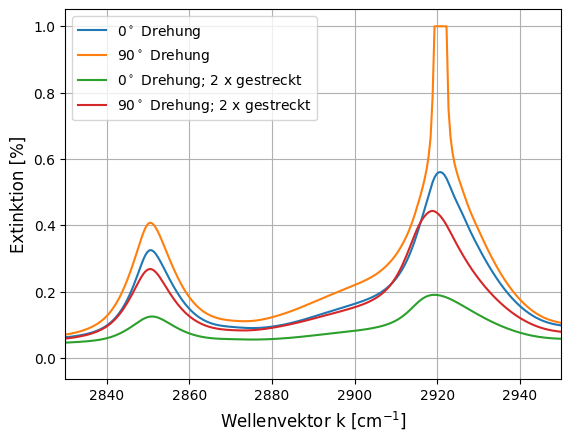

In [14]:
#First Look on the Data

plt.plot(std_ext_0deg[:,0],(std_ext_0deg[:,1]/np.max(std_ex_90degree[:,1])) ,label=r"$0^\circ$ Drehung")
plt.plot(std_ex_90degree[:,0],(std_ex_90degree[:,1]/np.max(std_ex_90degree[:,1])) ,label= r"90$^\circ$ Drehung")
plt.plot(std2_0degree_stretched2x[:,0],(std2_0degree_stretched2x[:,1]/np.max(std_ex_90degree[:,1])) ,label=r"0$^\circ$ Drehung; 2 x gestreckt")
plt.plot(stdd2_90degree_2xstretched[:,0],(stdd2_90degree_2xstretched[:,1]/np.max(std_ex_90degree[:,1])) ,label=r"$90^\circ$ Drehung; 2 x gestreckt")

plt.xlim((2830,2950))
plt.grid(True)
plt.xlabel(r"Wellenvektor k $[\mathrm{cm}^{-1}]$",fontsize=12)
plt.ylabel("Extinktion [%]",fontsize=12)
plt.legend(loc = 0)
plt.savefig("newplots/Dichro_all_zoom.pdf")

0.001686007972485954 0.0016022704810916377
ight)
ight)
Spitzenwert1 = 0.41\pm0.0017
Spitzenwert2 = 0.32\pm0.0016
D = 0.1121541 ± 0.0031827


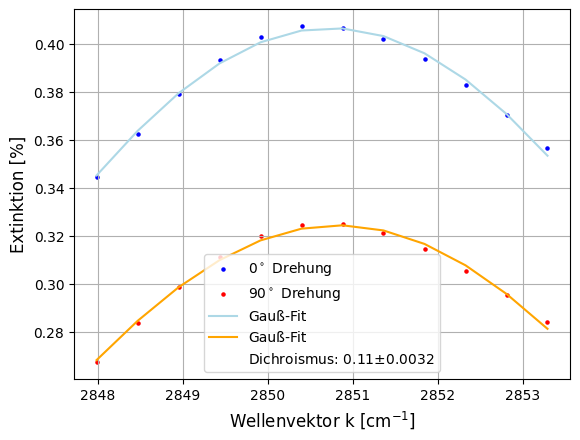

In [13]:
#Import Data 
xdata = np.asarray(std_ex_90degree[5078:5090,0])
ydata = np.asarray(std_ex_90degree[5078:5090,1]/np.max(std_ex_90degree[:,1]))
xdata1 = np.asarray(std_ext_0deg[5077:5089,0])
ydata1 = np.asarray(std_ext_0deg[5077:5089,1]/np.max(std_ex_90degree[:,1]))

#estimate values for the gaussian fit
n = len(xdata)    
mean = 2850                                  
sigma = sum(ydata*(xdata-mean)**2)/n

#define gaussian
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

#fit gaussian
popt,pcov = curve_fit(gaus,xdata,ydata,p0=[1,mean,sigma])
popt1,pcov1 = curve_fit(gaus,xdata1,ydata1, p0=[1,mean,sigma])


ypred = gaus(xdata,*popt)
ypred1  =gaus(xdata1,*popt1)
mse = np.mean((ydata - ypred)**2)
mse1 = np.mean((ydata1-ypred1)**2)
rmse = np.sqrt(mse)
rmse1 = np.sqrt(mse1)

int1 = gaus(xdata,*popt)
int2 = gaus(xdata1,*popt1)

f1 = np.max(int1)
f2 = np.max(int2)

#calculate dichroism and error
D = (f1-f2)/(f1+f2)
df = np.sqrt((rmse*(2*f2/(f1+f2)**2))**2+(rmse1*-2*f1/(f1+f2)**2)**2)

plt.scatter(xdata, ydata, label= r"0$^\circ$ Drehung",s=5,c="blue")
plt.scatter(xdata1, ydata1, label= r"90$^\circ$ Drehung",s=5,c="red")
plt.plot(xdata, gaus(xdata,*popt), '-', label='Gauß-Fit',c="lightblue")
plt.plot(xdata1, gaus(xdata1,*popt1), '-', label='Gauß-Fit',c="orange")
#plt.plot([popt[1],popt[1]],[1,2.5],"--",c="lightblue",label="y-max1="+str(np.round(f1,2)))
#plt.plot([popt1[1],popt1[1]],[1,2.5],"--",c="orange",label="y-max2="+str(np.round(f2,2)))
plt.plot(xdata,ydata,linestyle = "", label = "Dichroismus: "+str(round(D,sigfigs=2))+r"$\pm$"+str(round(df,sigfigs=2)))

plt.grid(True)
plt.xlabel(r"Wellenvektor k $[\mathrm{cm}^{-1}]$",fontsize=12)
plt.ylabel("Extinktion [%]",fontsize=12)
plt.legend(loc = 0)
plt.savefig("newplots/dichron0rotpeaks.pdf")

print(rmse,rmse1)
print(str(np.round(popt[0],2))+"\cdot\exp\left(-\\frac{"+"(x-"+str(np.round(popt[1],2))+")^2}{(2\cdot" +str(np.round(popt[2],2))+")^2}\right)")
print(str(np.round(popt1[0],2))+"\cdot\exp\left(-\\frac{"+"(x-"+str(np.round(popt1[1],2))+")^2}{(2\cdot" +str(np.round(popt1[2],2))+")^2}\right)")
print("Spitzenwert1 = "+str(np.round(f1,2))+"\pm"+str(np.round(rmse,4)))
print("Spitzenwert2 = "+str(np.round(f2,2))+"\pm"+str(np.round(rmse1,4)))
print("D = "+str(np.round(D,7))+r" ± "+str(np.round(df,7)))

[6.56637508e-01 2.85102232e+03 6.20879015e+00] [1.40787065e+00 2.85058834e+03 5.09207747e+00]
ight)
ight)
Spitzenwert1 = 0.66\pm0.0004
Spitzenwert2 = 1.41\pm0.002
D = 0.3636877 ± 0.0006664


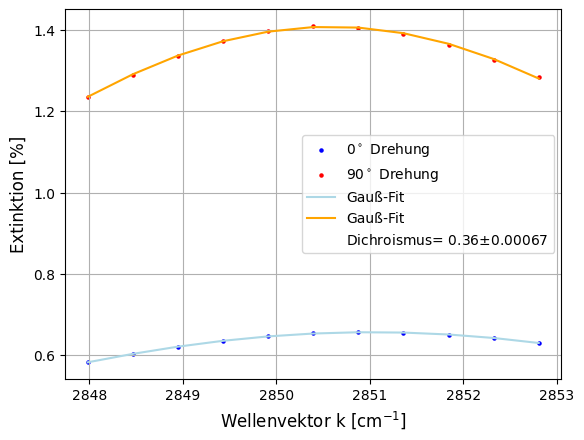

In [12]:
#import dara
x1 = np.asarray(std2_0degree_stretched2x[309:320,0])
y1 = np.asarray(std2_0degree_stretched2x[309:320,1]/np.max(std2_0degree_stretched2x[:,1]))
x2 = np.asarray(stdd2_90degree_2xstretched[309:320,0])
y2 = np.asarray(stdd2_90degree_2xstretched[309:320,1]/np.max(std2_0degree_stretched2x[:,1]))

#estimate values for the gaussian fit
n= len(x1) 
mean = 2850                     
sigma= sum(ydata*(xdata-mean)**2)/n

#fit gaussian
popt2,pcov2 = curve_fit(gaus,x1,y1,p0=[1,mean,sigma])
popt3,pcov3 = curve_fit(gaus,x2,y2,p0=[1,mean,sigma])

halfsigma2 = popt2[2]/2
halfsigma3 = popt3[2]/2

int3 = gaus(x1,*popt2)
int4 = gaus(x2,*popt3)

f3 = np.max(int3)
f4 = np.max(int4)

ypred3 = gaus(x1,*popt2)
ypred4  =gaus(x2,*popt3)
mse3 = np.mean((y1 - ypred3)**2)
mse4 = np.mean((y2-ypred4)**2)
rmse3 = np.sqrt(mse3)
rmse4 = np.sqrt(mse4)

#calculate dichroism and error
D = (f4-f3)/(f4+f3)
df = np.sqrt((rmse4*(2*f3/(f4+f3)**2))**2+(rmse3*-2*f4/(f4+f3)**2)**2)

plt.scatter(x1, y1, s=5,c="blue",label= r"0$^\circ$ Drehung")
plt.scatter(x2, y2, s=5,c="red",label= r"90$^\circ$ Drehung")

plt.plot(x1, gaus(x1,*popt2), '-',c="lightblue",label='Gauß-Fit')
plt.plot(x2, gaus(x2,*popt3), '-',c="orange",label='Gauß-Fit')

#plt.plot([popt3[1],popt3[1]],[0.4,2],"--",c="orange",label="Spitze bei y="+str(np.round(f3,2)))
#plt.plot([popt2[1],popt2[1]],[0.4,2],"--",c="lightblue",label="Spitze bei y="+str(np.round(f4,2)))
plt.plot(x1,y1,linestyle = "", label = "Dichroismus= "+str(round(D,sigfigs=2))+r"$\pm$"+str(round(df,sigfigs=2)))


plt.grid(True)
plt.xlabel(r"Wellenvektor k $[\mathrm{cm}^{-1}]$",fontsize=12)
plt.ylabel("Extinktion [%]",fontsize=12)
plt.legend(loc = 0)
plt.savefig("newplots/dichronstretched.pdf")

print(popt2,popt3)
print(str(np.round(popt2[0],2))+"\cdot\exp\left(-\\frac{"+"(x-"+str(np.round(popt2[1],2))+")^2}{(2\cdot"+str(np.round(popt2[2],2))+")^2}\right)")
print(str(np.round(popt3[0],2))+"\cdot\exp\left(-\\frac{"+"(x-"+str(np.round(popt3[1],2))+")^2}{(2\cdot"+str(np.round(popt3[2],2))+")^2}\right)")
print("Spitzenwert1 = "+str(np.round(f3,2))+"\pm"+str(np.round(rmse3,4)))
print("Spitzenwert2 = "+str(np.round(f4,2))+"\pm"+str(np.round(rmse4,4)))
print("D = "+str(np.round(D,7))+r" ± "+str(np.round(df,7)))

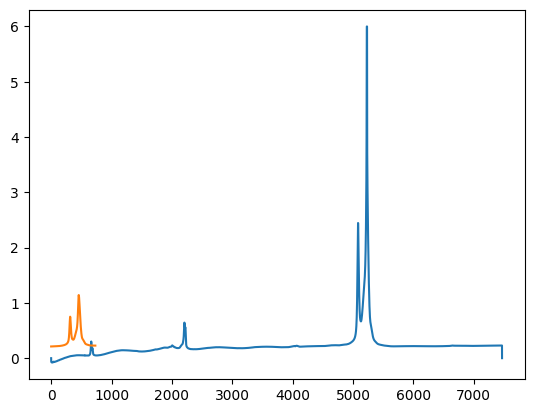

In [143]:
#This block is used to find the right indices of the array cause index /= wave-vector
#plt.axis([300,330,0,3])

xax = np.arange(0,len(std_ex_90degree))
xax2 = np.arange(0,len(std2_0degree_stretched2x))

plt.plot(xax, std_ex_90degree[:,1])
plt.plot(xax2, std2_0degree_stretched2x[:,1])